## Superfund cleanups, nationwide and on the west coast 


Ashli Blow 

### Import Data & Packages

In [1]:
import os
import requests

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona
import xyzservices.providers as xyz

In [2]:
#%matplotlib widget

In [3]:
datadir = '/home/jovyan/superfund-gentrification/Data'
fixed_fn = '/home/jovyan/superfund-gentrification/Data/fixed_effects.csv'
socio_stand_fn = '/home/jovyan/superfund-gentrification/Data/socio_stand.csv'
socio_nom_fn = '/home/jovyan/superfund-gentrification/Data/socio_nom_income _west_coast.csv'

In [4]:
print("Fixed Effects Data:", fixed_fn)
print("Socioeconomic Data - Standard:", socio_stand_fn)
print("Socioeconomic Data - Nomnial:", socio_nom_fn)

Fixed Effects Data: /home/jovyan/superfund-gentrification/Data/fixed_effects.csv
Socioeconomic Data - Standard: /home/jovyan/superfund-gentrification/Data/socio_stand.csv
Socioeconomic Data - Nomnial: /home/jovyan/superfund-gentrification/Data/socio_nom_income _west_coast.csv


### Fixed Effects DataFrame

In [5]:
#Reading in and projecting fixed effects 

fixed_df = pd.read_csv(fixed_fn)
aea_proj_str = '+proj=aea +lat_1=37.00 +lat_2=47.00 +lat_0=42.00 +lon_0=-114.27'
fixed_gdf = gpd.GeoDataFrame(fixed_df, crs='EPSG:4326', geometry=gpd.points_from_xy(fixed_df['lon'], fixed_df['lat']))
fixed_gdf_aea = fixed_gdf.to_crs(aea_proj_str)
fixed_gdf_aea.head()

,site,sitescore,state,county,city,street,zip,lat,lon,state_fips,...,tracts,tract_fips,status_epa,states_plaintalk,status_binary,cercla1990,cercla2000,cercla2010,cercla2020,geometry
0,"Redwing Carriers, Inc. (Saraland)",30.83,Alabama,Mobile,Saraland,Craig Dr,36571.0,30.808331,-88.073061,1.0,...,5400.0,1.097005e+09,Deleted NPL Site,Completed,1,0,0,1,1,POINT (2500797.782 -855198.329)
1,Stauffer Chemical Co. (LeMoyne Plant),32.34,Alabama,Mobile,Axis,US 43,36560.0,30.969439,-88.017500,1.0,...,5702.0,1.097006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2500633.447 -836762.935)
2,Triana/Tennessee River,61.42,Alabama,"Limestone, Madison, Morgan","Limestone, Morgan",Signal Point Dr,35754.0,34.508888,-86.638194,1.0,...,5704.0,1.103006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2504565.873 -426248.662)
3,Stauffer Chemical Co. (Cold Creek Plant),46.77,Alabama,Mobile,Bucks,US 43,36560.0,30.975000,-88.021389,1.0,...,5800.0,1.097006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2500091.552 -836295.442)
4,T.H. Agriculture & Nutrition Co. (Montgomery P...,44.46,Alabama,Montgomery,Montgomery,Birmingham Hwy,36108.0,32.376100,-86.379100,1.0,...,6000.0,1.101006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2602153.612 -641411.339)


In [6]:
fixed_df = pd.read_csv(fixed_fn)
fixed_df.head()

,site,sitescore,state,county,city,street,zip,lat,lon,state_fips,county_fips,tracts,tract_fips,status_epa,states_plaintalk,status_binary,cercla1990,cercla2000,cercla2010,cercla2020
0,"Redwing Carriers, Inc. (Saraland)",30.83,Alabama,Mobile,Saraland,Craig Dr,36571.0,30.808331,-88.073061,1.0,1097.0,5400.0,1.097005e+09,Deleted NPL Site,Completed,1,0,0,1,1
1,Stauffer Chemical Co. (LeMoyne Plant),32.34,Alabama,Mobile,Axis,US 43,36560.0,30.969439,-88.017500,1.0,1097.0,5702.0,1.097006e+09,NPL Site,In Process,0,0,0,0,0
2,Triana/Tennessee River,61.42,Alabama,"Limestone, Madison, Morgan","Limestone, Morgan",Signal Point Dr,35754.0,34.508888,-86.638194,1.0,1103.0,5704.0,1.103006e+09,NPL Site,In Process,0,0,0,0,0
3,Stauffer Chemical Co. (Cold Creek Plant),46.77,Alabama,Mobile,Bucks,US 43,36560.0,30.975000,-88.021389,1.0,1097.0,5800.0,1.097006e+09,NPL Site,In Process,0,0,0,0,0
4,T.H. Agriculture & Nutrition Co. (Montgomery P...,44.46,Alabama,Montgomery,Montgomery,Birmingham Hwy,36108.0,32.376100,-86.379100,1.0,1101.0,6000.0,1.101006e+09,NPL Site,In Process,0,0,0,0,0


In [7]:
aea_proj_str = '+proj=aea +lat_1=37.00 +lat_2=47.00 +lat_0=42.00 +lon_0=-114.27'
fixed_gdf = gpd.GeoDataFrame(fixed_df, crs='EPSG:4326', geometry=gpd.points_from_xy(fixed_df['lon'], fixed_df['lat']))
fixed_gdf_aea = fixed_gdf.to_crs(aea_proj_str)
fixed_gdf_aea.head()

,site,sitescore,state,county,city,street,zip,lat,lon,state_fips,...,tracts,tract_fips,status_epa,states_plaintalk,status_binary,cercla1990,cercla2000,cercla2010,cercla2020,geometry
0,"Redwing Carriers, Inc. (Saraland)",30.83,Alabama,Mobile,Saraland,Craig Dr,36571.0,30.808331,-88.073061,1.0,...,5400.0,1.097005e+09,Deleted NPL Site,Completed,1,0,0,1,1,POINT (2500797.782 -855198.329)
1,Stauffer Chemical Co. (LeMoyne Plant),32.34,Alabama,Mobile,Axis,US 43,36560.0,30.969439,-88.017500,1.0,...,5702.0,1.097006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2500633.447 -836762.935)
2,Triana/Tennessee River,61.42,Alabama,"Limestone, Madison, Morgan","Limestone, Morgan",Signal Point Dr,35754.0,34.508888,-86.638194,1.0,...,5704.0,1.103006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2504565.873 -426248.662)
3,Stauffer Chemical Co. (Cold Creek Plant),46.77,Alabama,Mobile,Bucks,US 43,36560.0,30.975000,-88.021389,1.0,...,5800.0,1.097006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2500091.552 -836295.442)
4,T.H. Agriculture & Nutrition Co. (Montgomery P...,44.46,Alabama,Montgomery,Montgomery,Birmingham Hwy,36108.0,32.376100,-86.379100,1.0,...,6000.0,1.101006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2602153.612 -641411.339)


### Superfund Site Locations Plotted 

<Axes: >

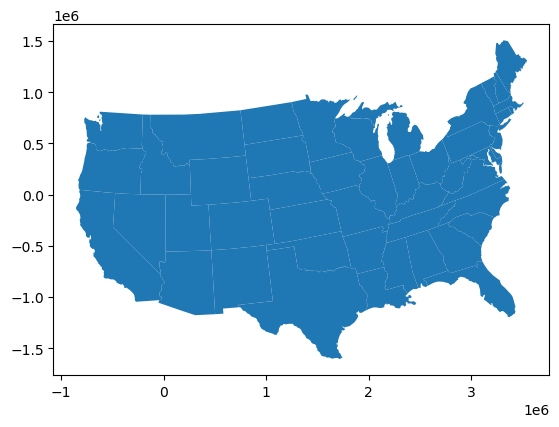

In [8]:
states_gdf = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

idx = states_gdf['name'].isin(['Alaska','Puerto Rico','Hawaii'])
states_gdf = states_gdf[~idx]

aea_proj_str = '+proj=aea +lat_1=37.00 +lat_2=47.00 +lat_0=42.00 +lon_0=-114.27'

aea_crs = fixed_gdf_aea.crs
aea_crs

states_gdf_aea = states_gdf.to_crs(aea_crs)
states_gdf_aea.plot()

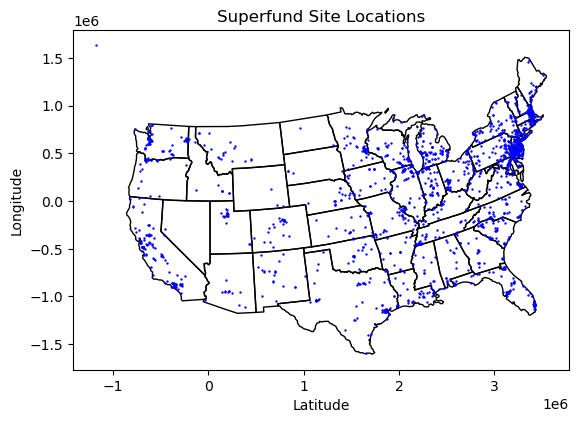

In [9]:
f, ax = plt.subplots()

states_gdf_aea.plot(ax=ax, facecolor='none', edgecolor='k')
fixed_gdf_aea.plot(ax=ax, marker='o', color='blue', markersize=.5, label='Sites')

plt.title('Superfund Site Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.show()

### Superfund Sites Choropleth Map

#### All Sites

In [10]:
#spatial join datasets 

fixed_gdf_aea_states = gpd.sjoin(fixed_gdf_aea, states_gdf_aea)
fixed_gdf_aea_states.head()

,site,sitescore,state,county,city,street,zip,lat,lon,state_fips,...,status_binary,cercla1990,cercla2000,cercla2010,cercla2020,geometry,index_right,id,name,density
0,"Redwing Carriers, Inc. (Saraland)",30.83,Alabama,Mobile,Saraland,Craig Dr,36571.0,30.808331,-88.073061,1.0,...,1,0,0,1,1,POINT (2500797.782 -855198.329),0,01,Alabama,94.65
1,Stauffer Chemical Co. (LeMoyne Plant),32.34,Alabama,Mobile,Axis,US 43,36560.0,30.969439,-88.017500,1.0,...,0,0,0,0,0,POINT (2500633.447 -836762.935),0,01,Alabama,94.65
2,Triana/Tennessee River,61.42,Alabama,"Limestone, Madison, Morgan","Limestone, Morgan",Signal Point Dr,35754.0,34.508888,-86.638194,1.0,...,0,0,0,0,0,POINT (2504565.873 -426248.662),0,01,Alabama,94.65
3,Stauffer Chemical Co. (Cold Creek Plant),46.77,Alabama,Mobile,Bucks,US 43,36560.0,30.975000,-88.021389,1.0,...,0,0,0,0,0,POINT (2500091.552 -836295.442),0,01,Alabama,94.65
4,T.H. Agriculture & Nutrition Co. (Montgomery P...,44.46,Alabama,Montgomery,Montgomery,Birmingham Hwy,36108.0,32.376100,-86.379100,1.0,...,0,0,0,0,0,POINT (2602153.612 -641411.339),0,01,Alabama,94.65


In [11]:
print(f"Original count: {fixed_gdf_aea.shape[0]}")
print(f"Joined count: {fixed_gdf_aea_states.shape[0]}")

Original count: 1747
Joined count: 1732


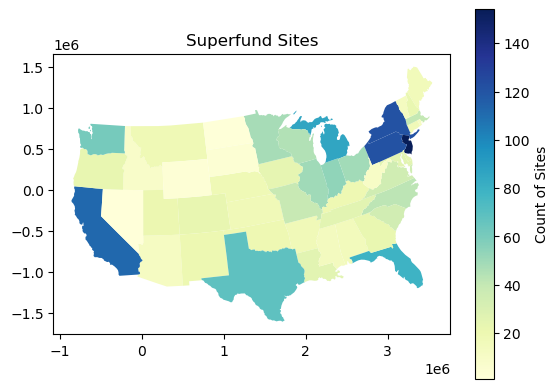

In [12]:
fixed_gdf_aea_states_agg = fixed_gdf_aea_states.groupby('name')['site'].agg(['count'])
fixed_gdf_aea_states_agg.rename(columns={'count': 'site_count'}, inplace=True)
fixed_gdf_aea_states_agg.head()

states_gdf_aea_merge = states_gdf_aea.merge(fixed_gdf_aea_states_agg, on='name')
states_gdf_aea_merge.head() 

fig, ax = plt.subplots(1, 1)
states_gdf_aea_merge.plot('site_count', ax=ax, legend=True, cmap='YlGnBu', legend_kwds={'label': "Count of Sites", 'orientation': "vertical"})
ax.set_title('Superfund Sites')
plt.savefig('/home/jovyan/superfund-gentrification/Graphics/site_fullcount_map.jpg', dpi=300, bbox_inches='tight')
plt.show()

#### Sites Cleaned Up

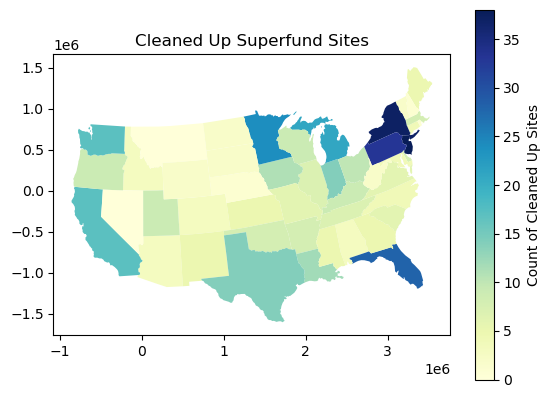

In [13]:
fixed_gdf_aea_states_clean = fixed_gdf_aea_states[fixed_gdf_aea_states['cercla2020'] == 1]

fixed_gdf_aea_states_agg_clean = fixed_gdf_aea_states_clean.groupby('name')['site'].agg(['count']).reset_index()

fixed_gdf_aea_states_agg_clean.rename(columns={'count': 'site_count'}, inplace=True)

states_gdf_aea_merge_clean = states_gdf_aea.merge(fixed_gdf_aea_states_agg_clean, on='name', how='left')

states_gdf_aea_merge_clean['site_count'] = states_gdf_aea_merge_clean['site_count'].fillna(0)

fig, axs = plt.subplots(1, 1)
states_gdf_aea_merge_clean.plot(column='site_count', ax=axs, legend=True, cmap='YlGnBu', legend_kwds={'label': "Count of Cleaned Up Sites", 'orientation': "vertical"})
axs.set_title('Cleaned Up Superfund Sites')
plt.show()



In [14]:
fixed_gdf_aea_states_stats = fixed_gdf_aea_states.groupby('name')['site'].count().reset_index()
fixed_gdf_aea_states_stats.columns = ['name', 'count']
fixed_gdf_aea_states_stats_sorted = fixed_gdf_aea_states_stats.sort_values('count', ascending=False)
fixed_gdf_aea_states_stats_sorted.head()

,name,count
28,New Jersey,154
30,New York,121
36,Pennsylvania,121
3,California,112
20,Michigan,86


In [15]:
mean_values = fixed_gdf_aea_states[['cercla1990', 'cercla2000', 'cercla2010', 'cercla2020']].mean()
mean_values_df = fixed_gdf_aea_states[['cercla1990', 'cercla2000', 'cercla2010', 'cercla2020']].mean().to_frame().T

mean_values_df.head()

,cercla1990,cercla2000,cercla2010,cercla2020
0,0.113741,0.187067,0.234988,0.252887


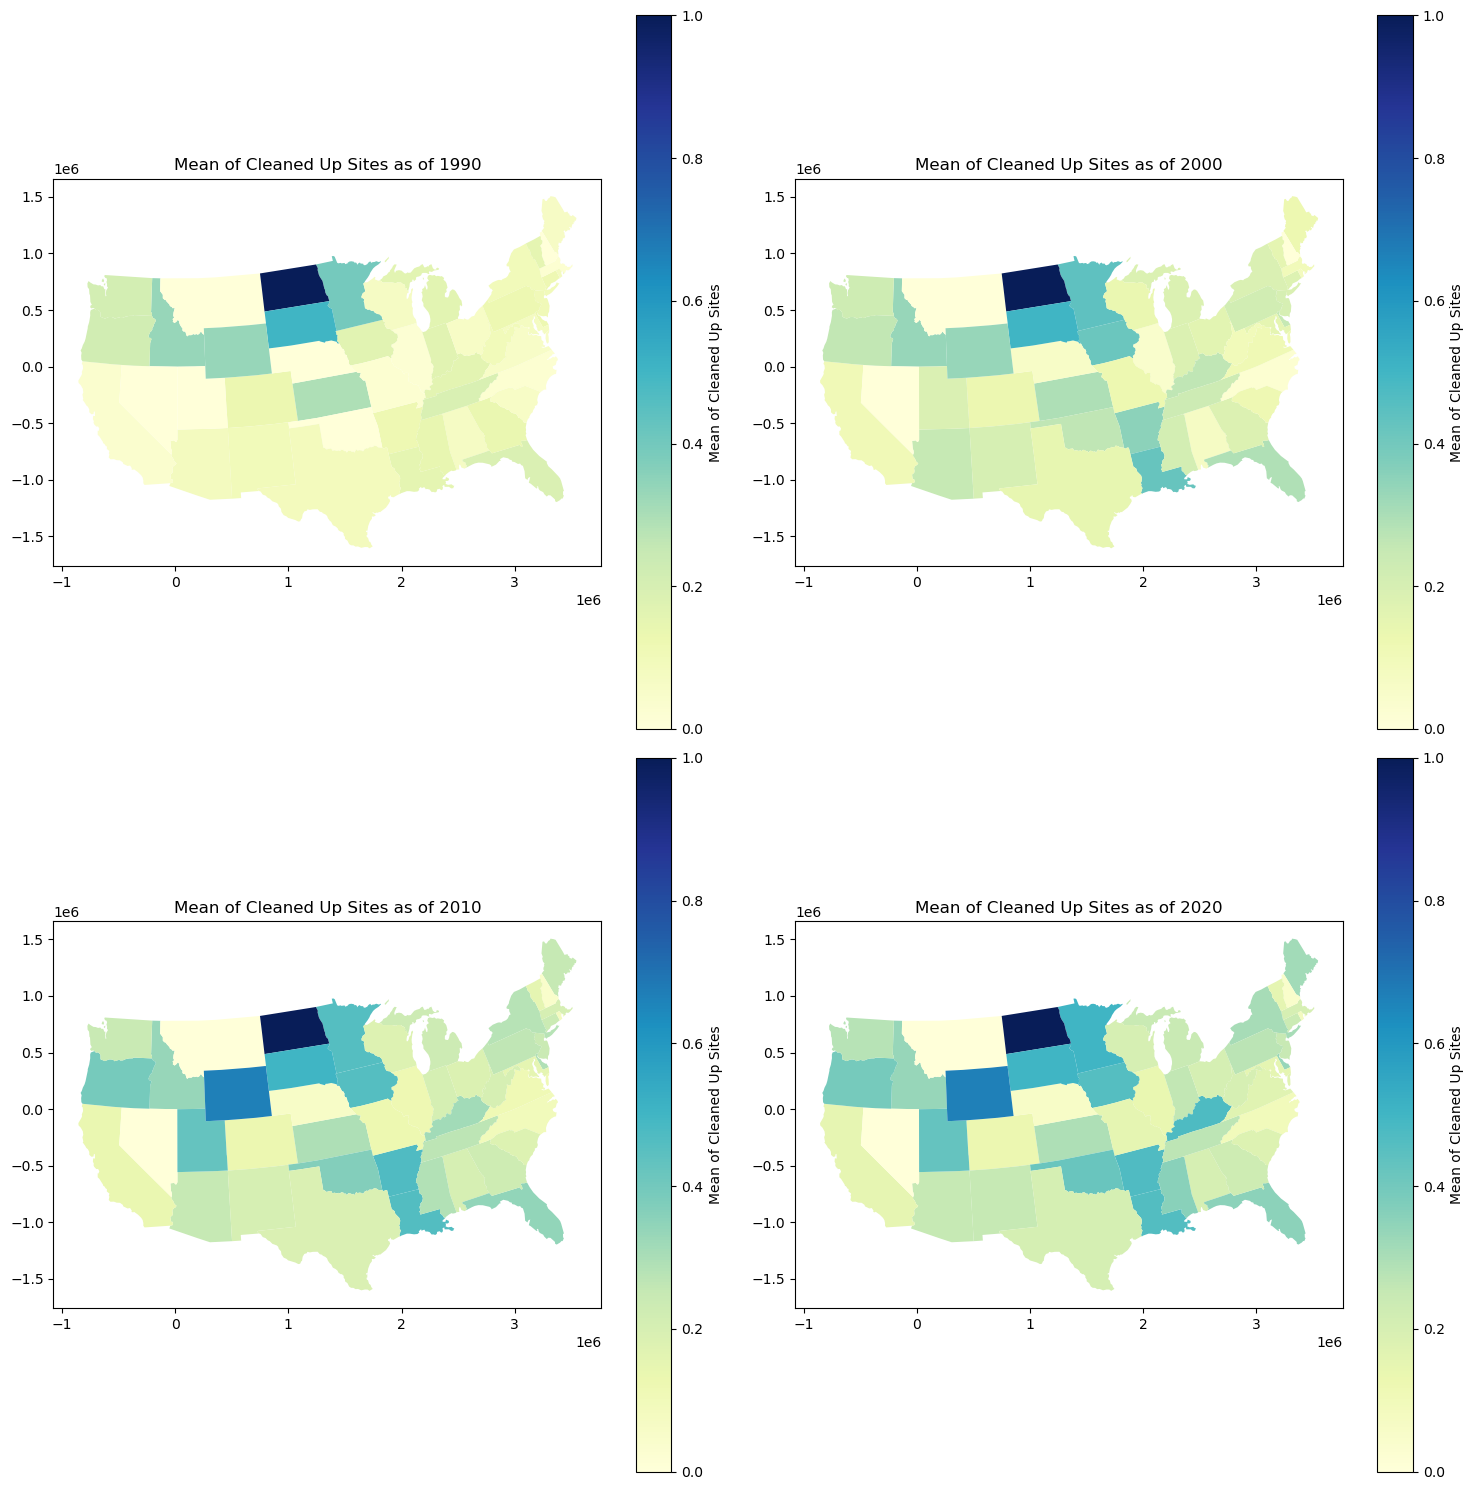

In [16]:
# Group by 'name' and calculate the mean for each 'cercla' column
fixed_gdf_aea_states_agg = fixed_gdf_aea_states.groupby('name').agg({'cercla1990': 'mean', 'cercla2000': 'mean', 'cercla2010': 'mean', 'cercla2020': 'mean'}).reset_index()

# Rename the columns
fixed_gdf_aea_states_agg.rename(columns={'cercla1990': 'mean_1990', 'cercla2000': 'mean_2000', 'cercla2010': 'mean_2010', 'cercla2020': 'mean_2020'}, inplace=True)

# Merge the GeoDataFrame with the aggregated DataFrame
states_gdf_aea_merge = states_gdf_aea.merge(fixed_gdf_aea_states_agg, on='name', how='left')

# Fill any missing values with 0
for year in ['1990', '2000', '2010', '2020']:
    states_gdf_aea_merge[f'mean_{year}'] = states_gdf_aea_merge[f'mean_{year}'].fillna(0)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Create a choropleth map for each decade
for i, year in enumerate(['1990', '2000', '2010', '2020']):
    ax = axs[i//2, i%2]
    states_gdf_aea_merge.plot(column=f'mean_{year}', ax=ax, legend=True, cmap='YlGnBu', legend_kwds={'label': "Mean of Cleaned Up Sites", 'orientation': "vertical"})
    ax.set_title(f'Mean of Cleaned Up Sites as of {year}')

plt.tight_layout()
plt.show()

#### West Coast

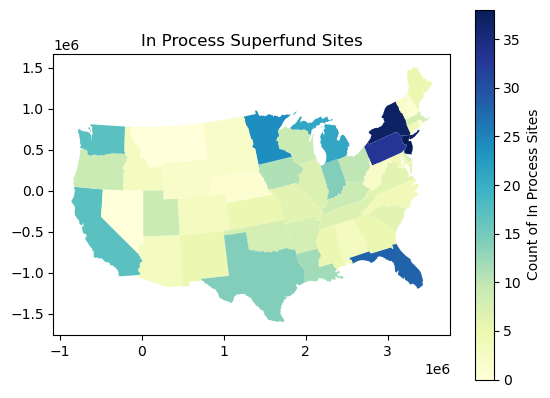

In [17]:
fixed_gdf_aea_states_clean = fixed_gdf_aea_states[fixed_gdf_aea_states['cercla2020'] == 1]

fixed_gdf_aea_states_agg_clean = fixed_gdf_aea_states_clean.groupby('name').agg({'site': 'count'}).reset_index()

fixed_gdf_aea_states_agg_clean.rename(columns={'site': 'count'}, inplace=True)

states_gdf_aea_merge_clean = states_gdf_aea.merge(fixed_gdf_aea_states_agg_clean, on='name', how='left')

states_gdf_aea_merge_clean['count'] = states_gdf_aea_merge_clean['count'].fillna(0)

#nationwide view
fig, ax = plt.subplots(1, 1)
states_gdf_aea_merge_clean.plot(column='count', ax=ax, legend=True, cmap="YlGnBu", legend_kwds={'label': "Count of In Process Sites", 'orientation': "vertical"})
ax.set_title('In Process Superfund Sites')
plt.show()

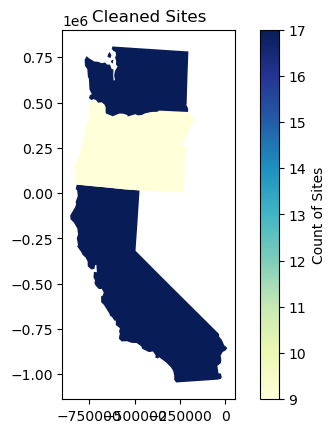

In [18]:
#west coast cleaned up site count 

west_coast_fixed_gdf_aea_states_clean = fixed_gdf_aea_states[fixed_gdf_aea_states['cercla2020'] == 1]

west_coast_fixed_gdf_aea_states_agg_clean = west_coast_fixed_gdf_aea_states_clean.groupby('name').agg({'site': 'count'}).reset_index()

west_coast_fixed_gdf_aea_states_agg_clean.rename(columns={'site': 'count'}, inplace=True)

west_coast_states_gdf_aea_merge_clean = states_gdf_aea.merge(west_coast_fixed_gdf_aea_states_agg_clean, on='name', how='left')

west_coast_states_gdf_aea_merge_clean['count'] = west_coast_states_gdf_aea_merge_clean['count'].fillna(0)

west_coast_states = ['California', 'Washington', 'Oregon']
west_coast_states_gdf_aea_merge_clean = west_coast_states_gdf_aea_merge_clean[west_coast_states_gdf_aea_merge_clean['name'].isin(west_coast_states)]

fig, ax = plt.subplots(1, 1)
west_coast_states_gdf_aea_merge_clean.plot(column='count', ax=ax, legend=True, cmap='YlGnBu', legend_kwds={'label': "Count of Sites", 'orientation': "vertical"})
ax.set_title('Cleaned Sites')
plt.show()

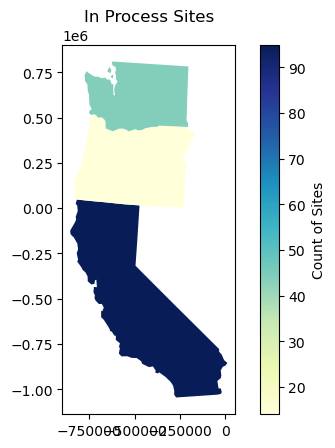

In [19]:
#West Coast in process sites count

west_coast_fixed_gdf_aea_states_notclean = fixed_gdf_aea_states[fixed_gdf_aea_states['cercla2020'] == 0]

west_coast_fixed_gdf_aea_states_agg_notclean = west_coast_fixed_gdf_aea_states_notclean.groupby('name').agg({'site': 'count'}).reset_index()

west_coast_fixed_gdf_aea_states_agg_notclean.rename(columns={'site': 'count'}, inplace=True)

west_coast_states_gdf_aea_merge_notclean = states_gdf_aea.merge(west_coast_fixed_gdf_aea_states_agg_notclean, on='name', how='left')

west_coast_states_gdf_aea_merge_notclean['count'] = west_coast_states_gdf_aea_merge_notclean['count'].fillna(0)

west_coast_states = ['California', 'Washington', 'Oregon']
west_coast_states_gdf_aea_merge_notclean = west_coast_states_gdf_aea_merge_notclean[west_coast_states_gdf_aea_merge_notclean['name'].isin(west_coast_states)]

fig, ax = plt.subplots(1, 1)
west_coast_states_gdf_aea_merge_notclean.plot(column='count', ax=ax, legend=True, cmap='YlGnBu', legend_kwds={'label': "Count of Sites", 'orientation': "vertical"})
ax.set_title('In Process Sites')
plt.show()

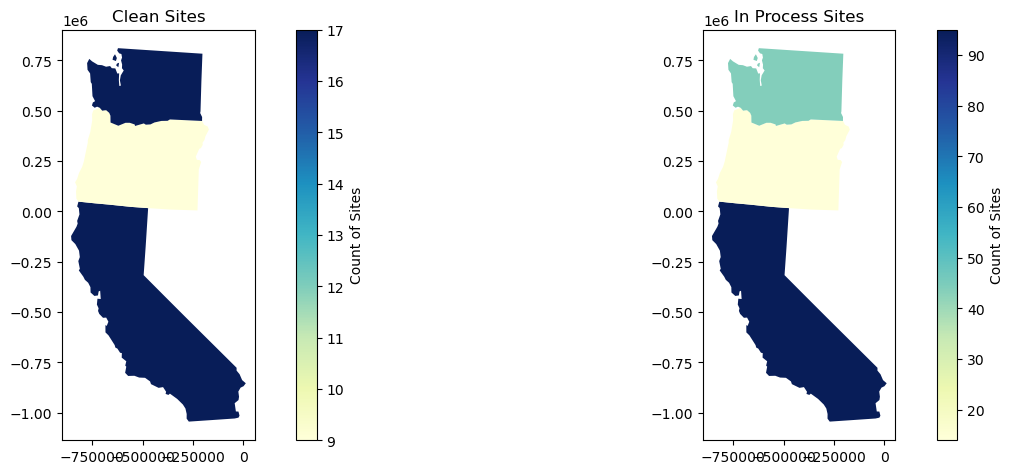

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

west_coast_states_gdf_aea_merge_clean.plot(column='count', ax=axs[0], legend=True, cmap='YlGnBu', legend_kwds={'label': "Count of Sites", 'orientation': "vertical"})
axs[0].set_title('Clean Sites')

# Plot on the second subplot
west_coast_states_gdf_aea_merge_notclean.plot(column='count', ax=axs[1], legend=True, cmap='YlGnBu', legend_kwds={'label': "Count of Sites", 'orientation': "vertical"})
axs[1].set_title('In Process Sites')

plt.tight_layout()
plt.savefig('/home/jovyan/superfund-gentrification/Graphics/site_westcoast_map.jpg', dpi=300, bbox_inches='tight')
plt.show()

#### East Coast

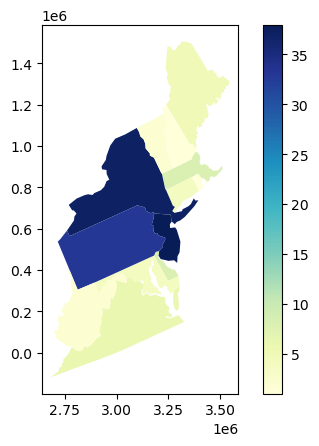

In [21]:
#East coast cleaned up sites count 

east_coast_fixed_gdf_aea_states_clean = fixed_gdf_aea_states[fixed_gdf_aea_states['cercla2020'] == 1]

east_coast_fixed_gdf_aea_states_agg_clean = east_coast_fixed_gdf_aea_states_clean.groupby('name').agg({'site': 'count'}).reset_index()

east_coast_fixed_gdf_aea_states_agg_clean.rename(columns={'site': 'count'}, inplace=True)

east_coast_states_gdf_aea_merge_clean = states_gdf_aea.merge(east_coast_fixed_gdf_aea_states_agg_clean, on='name', how='left')

east_coast_states_gdf_aea_merge_clean['count'] = east_coast_states_gdf_aea_merge_clean['count'].fillna(0)

east_coast_states = ['New York', 'Virginia', 'New Jersey', 'Connecticut', 'Maryland', 'Massachusetts', 'Delaware', 'Rhode Island', 'Maine', 'New Hampshire', 'Vermont', 'Pennsylvania', 'West Virginia']
east_coast_states_gdf_aea_merge_clean = east_coast_states_gdf_aea_merge_clean[east_coast_states_gdf_aea_merge_clean['name'].isin(east_coast_states)]

fig, ax = plt.subplots(1, 1)
east_coast_states_gdf_aea_merge_clean.plot(column='count', ax=ax, legend=True, cmap='YlGnBu')
plt.show()

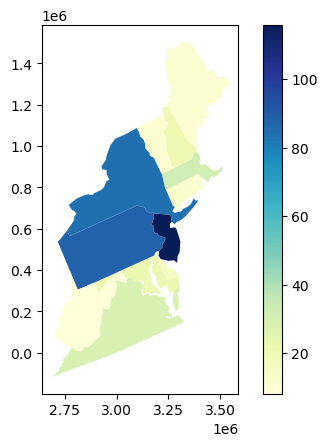

In [22]:
#East coast in process sites count 

east_coast_fixed_gdf_aea_states_notclean = fixed_gdf_aea_states[fixed_gdf_aea_states['cercla2020'] == 0]

east_coast_fixed_gdf_aea_states_agg_notclean = east_coast_fixed_gdf_aea_states_notclean.groupby('name').agg({'site': 'count'}).reset_index()

east_coast_fixed_gdf_aea_states_agg_notclean.rename(columns={'site': 'count'}, inplace=True)

east_coast_states_gdf_aea_merge_notclean = states_gdf_aea.merge(east_coast_fixed_gdf_aea_states_agg_notclean, on='name', how='left')

east_coast_states_gdf_aea_merge_notclean['count'] = east_coast_states_gdf_aea_merge_notclean['count'].fillna(0)

east_coast_states = ['New York', 'Virginia', 'New Jersey', 'Connecticut', 'Maryland', 'Massachusetts', 'Delaware', 'Rhode Island', 'Maine', 'New Hampshire', 'Vermont', 'Pennsylvania', 'West Virginia']
east_coast_states_gdf_aea_merge_notclean = east_coast_states_gdf_aea_merge_notclean[east_coast_states_gdf_aea_merge_notclean['name'].isin(east_coast_states)]

fig, ax = plt.subplots(1, 1)
east_coast_states_gdf_aea_merge_notclean.plot(column='count', ax=ax, legend=True, cmap='YlGnBu')
plt.show()

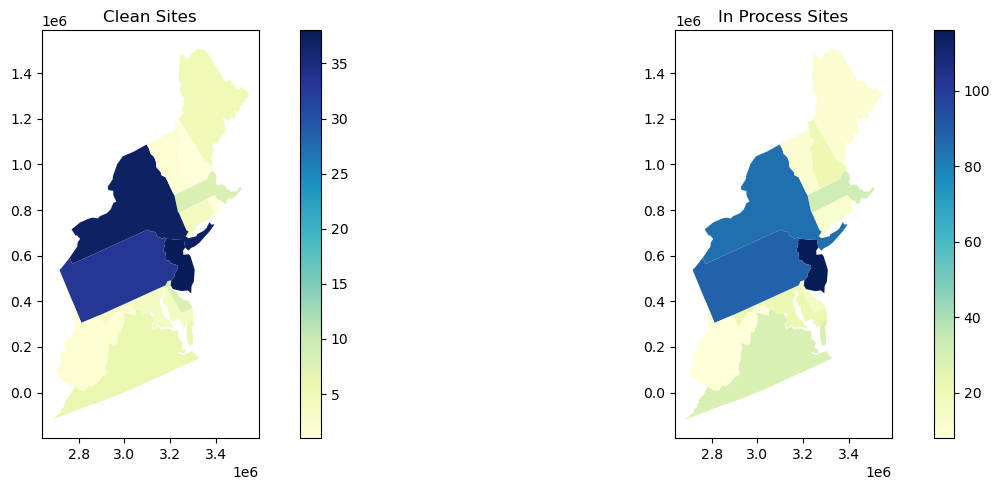

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

east_coast_states_gdf_aea_merge_clean.plot(column='count', ax=axs[0], legend=True, cmap='YlGnBu')
axs[0].set_title('Clean Sites')

east_coast_states_gdf_aea_merge_notclean.plot(column='count', ax=axs[1], legend=True, cmap='YlGnBu')
axs[1].set_title('In Process Sites')

plt.tight_layout()
plt.show()

#### Summary Statistics

In [24]:
#for fixed effects 

summary_stats = fixed_gdf_aea_states.describe()
summary_stats.head()

,sitescore,zip,lat,lon,state_fips,county_fips,tracts,tract_fips,status_binary,cercla1990,cercla2000,cercla2010,cercla2020,index_right,density
count,1732.000000,1731.000000,1732.000000,1732.000000,1731.000000,1731.000000,1731.000000,1.731000e+03,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000
mean,41.884371,44111.849798,39.162421,-88.523499,30.359908,30433.842288,278695.101675,3.043281e+10,0.252309,0.113741,0.187067,0.234988,0.252887,26.338337,311.883568
std,12.147826,29791.244532,4.713908,15.193628,14.485128,14494.691242,363827.716550,1.449661e+10,0.434463,0.317589,0.390078,0.424114,0.434792,13.582487,403.032386
min,0.000000,1069.000000,25.489444,-124.231700,1.000000,1003.000000,100.000000,1.003010e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.851000
25%,34.175000,17981.000000,36.619508,-94.778854,18.000000,18167.000000,10700.500000,1.816700e+10,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,98.070000


In [25]:
#for standardized data 

socio_stand = pd.read_csv(socio_stand_fn)
socio_stand_df = pd.DataFrame(socio_stand)
socio_stand_df.head()

,state,statefip,county,countyfip,tract,18under1990,18under2000,18under2010,18under2020,18over1990,...,nhpi2010,nhpi2020,gqi1990,gqi2000,gqi2010,gqi2020,gqni1990,gqni2000,gqni2010,gqni2020
0,California,6,Colusa County,11,100,1222.48,1486.95,1600,1543.0,2577.91,...,10,9.0,0.0,5.0,0,0.0,71.14,0.0,0,0.0
1,California,6,Fresno County,19,100,19.00,28.00,16,96.0,2253.00,...,2,11.0,1816.0,2318.0,2344,2793.0,0.00,21.0,23,84.0
2,California,6,Humboldt County,23,100,913.00,927.00,814,852.0,2927.00,...,32,67.0,0.0,0.0,12,21.0,93.00,206.0,763,634.0
3,California,6,Inyo County,27,100,662.01,708.03,613,598.0,2050.07,...,3,0.0,0.0,0.0,0,0.0,0.00,2.0,8,0.0
4,California,6,Kings County,31,100,1063.10,1007.10,965,744.0,2481.29,...,1,4.0,0.0,0.0,0,0.0,0.00,10.0,8,0.0


In [26]:
summary_stats = socio_stand_df.describe()
summary_stats.head()

,statefip,countyfip,tract,18under1990,18under2000,18under2010,18under2020,18over1990,18over2000,18over2010,...,nhpi2010,nhpi2020,gqi1990,gqi2000,gqi2010,gqi2020,gqni1990,gqni2000,gqni2010,gqni2020
count,10349.000000,10349.000000,10349.000000,10349.000000,10349.000000,10349.000000,10349.000000,10349.000000,10349.000000,10349.000000,...,10349.000000,10349.000000,10349.000000,10349.000000,10349.000000,10349.000000,10349.000000,10349.000000,10349.000000,10349.000000
mean,15.442072,51.717751,202171.436661,940.790607,1121.866659,1134.684221,1087.864931,2679.755722,3051.209564,3485.044255,...,19.157890,23.325925,44.938159,49.161755,47.501981,42.311238,45.756211,50.715238,53.554450,71.232969
std,17.911139,25.894445,272049.574830,519.080759,585.084620,664.424946,695.538413,1205.927250,1215.197654,1414.038114,...,32.572959,41.881678,276.653059,346.608090,362.887521,282.761971,329.197006,295.427430,337.879819,444.238639
min,6.000000,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,37.000000,8908.000000,581.000000,714.000000,695.000000,655.000000,1928.550000,2269.000000,2563.000000,...,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [55]:
column_names = ['0_10k1990', '0_10k2000', '0_10k2010', '0_10k2020', '11_14k1990',
       '11_14k2000', '11_14k2010', '11_14k2020', '15_19k1990', '15_19k2000',
       '15_19k2010', '15_19k2020', '20_24k1990', '20_24k2000', 
        '20_24k2010', '20_24k2020', '25_29k1990', '25_29k2000',
        '25_29k2010', '25_29k2020', '30_34k1990',
       '30_34k2000', '30_34k2010', '30_34k2020', '35_39k1990', '35_39k2000',
       '35_39k2010', '35_39k2020', '40_49k1990', '40_49k2000', '40_49k2010',
       '40_49k2020', '50_74k1990', '50_74k2000', '50_74k2010', '50_74k2020',
       '75kover1990', '75kover2000', '75kover2010', '75kover2020']

dtype_dict = {col: np.float64 for col in column_names}

socio_nom = pd.read_csv(socio_nom_fn, dtype=dtype_dict, na_values=[' '])
socio_nom_df = pd.DataFrame(socio_nom)

# Replace NaN values with 0
socio_nom_df = socio_nom_df.fillna(0)

In [28]:
socio_nom_df.head()

,NHGISCODE,GJOIN1990,GJOIN2000,GJOIN2014,GJOIN2019,GJOIN2022,state,statefip,county,countyfip,...,40_49k2010,40_49k2020,50_74k1990,50_74k2000,50_74k2010,50_74k2020,75kover1990,75kover2000,75kover2010,75kover2020
0,G0600050000100,0,G0600050000100,0,0,0,California,6,Amador County,5,...,0.0,0.0,0.0,528.0,0.0,0.0,0.0,476.0,0.0,0.0
1,G0600070000100,G06000700001,0,0,0,0,California,6,Butte County,7,...,0.0,0.0,420.0,0.0,0.0,0.0,159.0,0.0,0.0,0.0
2,G0600090000100,G06000900001,0,0,0,0,California,6,Calaveras County,9,...,0.0,0.0,433.0,0.0,0.0,0.0,174.0,0.0,0.0,0.0
3,G0600110000100,G06001100001,G0600110000100,G0600110000100,G0600110000100,G0600110000100,California,6,Colusa County,11,...,278.0,123.0,142.0,238.0,637.0,304.0,89.0,223.0,1171.0,832.0
4,G0600150000100,G06001500001,0,0,0,0,California,6,Del Norte County,15,...,0.0,0.0,472.0,0.0,0.0,0.0,187.0,0.0,0.0,0.0


In [29]:
#for nominal data 

summary_stats = socio_nom_df.describe()
summary_stats.head()

,statefip,countyfip,tracts,0_10k1990,0_10k2000,0_10k2010,0_10k2020,11_14k1990,11_14k2000,11_14k2010,...,40_49k2010,40_49k2020,50_74k1990,50_74k2000,50_74k2010,50_74k2020,75kover1990,75kover2000,75kover2010,75kover2020
count,16779.000000,16779.000000,16779.000000,16779.000000,16779.000000,16779.000000,16779.000000,16779.000000,16779.000000,16779.000000,...,16779.000000,16779.00000,16779.000000,16779.000000,16779.000000,16779.000000,16779.000000,16779.000000,16779.000000,16779.00000
mean,16.062042,52.356100,194258.591573,96.018714,74.779486,111.195542,46.088444,62.148102,51.273795,91.176709,...,156.102211,64.52971,139.729602,176.336909,339.423506,152.607128,104.512069,245.951010,918.197509,617.86352
std,18.328164,26.114809,273439.550251,165.395673,114.373582,150.810470,60.515437,100.560290,71.824920,126.010677,...,169.012354,71.70883,225.092873,211.241269,350.975245,145.144888,216.917692,358.646536,1075.346082,561.27361
min,6.000000,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,6.000000,37.000000,8126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


### Linear Regressions - West Coast

#### Race

In [37]:
# List of races
races = ['white', 'black', 'aian', 'asian', 'nhpi', 'hl']

# List of years
years = ['1990', '2000', '2010', '2020']

# Calculate the percentage for each race and each year
for year in years:
    total_population = socio_stand_df[[f'{race}{year}' for race in races]].sum(axis=1)
    for race in races:
        socio_stand_df[f'per{race}{year}'] = socio_stand_df[f'{race}{year}'] / total_population

# List of geographical columns to keep
geo_cols = ['state', 'statefip', 'county', 'countyfip', 'tract']

# Create a DataFrame with the geo and percentage columns
per_race_df = socio_stand_df[geo_cols + [f'per{race}{year}' for race in races for year in years]]
per_race_df

,state,statefip,county,countyfip,tract,perwhite1990,perwhite2000,perwhite2010,perwhite2020,perblack1990,...,perasian2010,perasian2020,pernhpi1990,pernhpi2000,pernhpi2010,pernhpi2020,perhl1990,perhl2000,perhl2010,perhl2020
0,California,6,Colusa County,11,100,0.592547,0.490350,0.502365,0.389430,0.001804,...,0.006257,0.008588,0.001353,0.003374,0.001526,0.001486,0.389642,0.480971,0.476118,0.582659
1,California,6,Fresno County,19,100,0.296205,0.318500,0.484198,0.297229,0.180281,...,0.029988,0.015113,0.000000,0.000954,0.000461,0.002771,0.495875,0.486650,0.367705,0.520907
2,California,6,Humboldt County,23,100,0.821802,0.765889,0.761735,0.638552,0.020408,...,0.029907,0.050737,0.002240,0.002080,0.006338,0.014527,0.061971,0.120176,0.137255,0.215308
3,California,6,Inyo County,27,100,0.919928,0.883949,0.796117,0.667703,0.000705,...,0.016070,0.016580,0.000353,0.000000,0.001004,0.000000,0.058555,0.095047,0.171409,0.290846
4,California,6,Kings County,31,100,0.716349,0.690061,0.642396,0.596962,0.002316,...,0.013171,0.014544,0.000260,0.002996,0.000249,0.001293,0.268971,0.282431,0.328280,0.372980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10344,Washington,53,San Juan County,55,990100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10345,Washington,53,Skagit County,57,990100,NaN,NaN,NaN,0.444444,NaN,...,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.500000
10346,Washington,53,Snohomish County,61,990100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10347,Washington,53,Thurston County,67,990100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
per_race_df = per_race_df.rename(columns={'tract': 'tracts'})

In [43]:
import statsmodels.formula.api as smf

# Merge the two DataFrames on the census tracts
merged_df = pd.merge(per_race_df, fixed_df, on='tracts')

# Initialize a dictionary to hold the results
results = {}

# Perform the regression analysis for each race and each decade
for race in races:
    for year in ['2000', '2010', '2020']:
        # Define the formula for the regression model
        formula = f'per{race}{year} ~ cercla{year}'

        # Fit the regression model
        model = smf.ols(formula, data=merged_df).fit()

        # Store the coefficient, p-value, and standard error in the results dictionary
        results[f'{race}_{year}'] = {'coefficient': model.params['cercla' + year], 'p-value': model.pvalues['cercla' + year], 'standard error': model.bse['cercla' + year]}

# Convert the results dictionary to a DataFrame
race_reg_df = pd.DataFrame(results)

race_reg_df

,white_2000,white_2010,white_2020,black_2000,black_2010,black_2020,aian_2000,aian_2010,aian_2020,asian_2000,asian_2010,asian_2020,nhpi_2000,nhpi_2010,nhpi_2020,hl_2000,hl_2010,hl_2020
coefficient,0.012105,0.011727,0.020681,-0.000598,-0.000360,-0.000399,0.003973,0.002851,0.001739,-0.003073,-0.001218,-0.002916,-0.000147,-0.000221,-0.000175,-0.012260,-0.012778,-0.018930
p-value,0.087078,0.061404,0.003499,0.737619,0.794520,0.767824,0.014577,0.050141,0.244835,0.177595,0.564776,0.189546,0.099912,0.058111,0.302147,0.034368,0.017873,0.002657
standard error,0.007074,0.006268,0.007080,0.001786,0.001383,0.001351,0.001626,0.001455,0.001495,0.002279,0.002115,0.002223,0.000089,0.000117,0.000169,0.005794,0.005394,0.006298


#### Income

In [44]:
income_df = socio_nom_df
income_df.head()

,NHGISCODE,GJOIN1990,GJOIN2000,GJOIN2014,GJOIN2019,GJOIN2022,state,statefip,county,countyfip,...,40_49k2010,40_49k2020,50_74k1990,50_74k2000,50_74k2010,50_74k2020,75kover1990,75kover2000,75kover2010,75kover2020
0,G0600050000100,0,G0600050000100,0,0,0,California,6,Amador County,5,...,0.0,0.0,0.0,528.0,0.0,0.0,0.0,476.0,0.0,0.0
1,G0600070000100,G06000700001,0,0,0,0,California,6,Butte County,7,...,0.0,0.0,420.0,0.0,0.0,0.0,159.0,0.0,0.0,0.0
2,G0600090000100,G06000900001,0,0,0,0,California,6,Calaveras County,9,...,0.0,0.0,433.0,0.0,0.0,0.0,174.0,0.0,0.0,0.0
3,G0600110000100,G06001100001,G0600110000100,G0600110000100,G0600110000100,G0600110000100,California,6,Colusa County,11,...,278.0,123.0,142.0,238.0,637.0,304.0,89.0,223.0,1171.0,832.0
4,G0600150000100,G06001500001,0,0,0,0,California,6,Del Norte County,15,...,0.0,0.0,472.0,0.0,0.0,0.0,187.0,0.0,0.0,0.0


In [45]:
# List of columns to consolidate
cols_to_consolidate = ['0_10k', '11_14k', '15_19k', '20_24k']

# Create the 'under25k' column by summing the specified columns for each decade
for year in years:
    income_df[f'under25k{year}'] = income_df[[f'{col}{year}' for col in cols_to_consolidate]].sum(axis=1)

# Drop the consolidated columns
income_df = income_df.drop(columns=[f'{col}{year}' for col in cols_to_consolidate for year in years])

In [50]:
# List of columns to consolidate
cols_to_consolidate = ['25_29k', '30_34k', '35_39k']

# Create the '25_39k' column by summing the specified columns
for year in years:
    income_df[f'25_39k{year}'] = income_df[[f'{col}{year}' for col in cols_to_consolidate]].sum(axis=1)

# Drop the consolidated columns
income_df = income_df.drop(columns=[f'{col}{year}' for col in cols_to_consolidate for year in years])

In [51]:
income_df.columns

Index(['NHGISCODE', 'GJOIN1990', 'GJOIN2000', 'GJOIN2014', 'GJOIN2019',
       'GJOIN2022', 'state', 'statefip', 'county', 'countyfip', 'tracts',
       '40_49k1990', '40_49k2000', '40_49k2010', '40_49k2020', '50_74k1990',
       '50_74k2000', '50_74k2010', '50_74k2020', '75kover1990', '75kover2000',
       '75kover2010', '75kover2020', 'under25k1990', 'under25k2000',
       'under25k2010', 'under25k2020', '25_39k1990', '25_39k2000',
       '25_39k2010', '25_39k2020'],
      dtype='object')

In [52]:
# List of income brackets
income_brackets = ['under25k', '25_39k', '40_49k', '50_74k', '75kover']

# List of years
years = ['1990', '2000', '2010', '2020']

# Calculate the percentage for each income bracket and each year
for year in years:
    total_income = income_df[[f'{bracket}{year}' for bracket in income_brackets]].sum(axis=1)
    for bracket in income_brackets:
        income_df[f'per{bracket}{year}'] = income_df[f'{bracket}{year}'] / total_income

# List of geographical columns to keep
geo_cols = ['state', 'statefip', 'county', 'countyfip', 'tracts']

# Create a DataFrame with the geo and percentage columns
per_income_df = income_df[geo_cols + [f'per{bracket}{year}' for bracket in income_brackets for year in years]]
per_income_df

,state,statefip,county,countyfip,tracts,perunder25k1990,perunder25k2000,perunder25k2010,perunder25k2020,per25_39k1990,...,per40_49k2010,per40_49k2020,per50_74k1990,per50_74k2000,per50_74k2010,per50_74k2020,per75kover1990,per75kover2000,per75kover2010,per75kover2020
0,California,6,Amador County,5,100,NaN,0.272249,NaN,NaN,NaN,...,NaN,NaN,NaN,0.198273,NaN,NaN,NaN,0.178746,NaN,NaN
1,California,6,Butte County,7,100,0.373099,NaN,NaN,NaN,0.303819,...,NaN,NaN,0.141940,NaN,NaN,NaN,0.053734,NaN,NaN,NaN
2,California,6,Calaveras County,9,100,0.473025,NaN,NaN,NaN,0.238152,...,NaN,NaN,0.129061,NaN,NaN,NaN,0.051863,NaN,NaN,NaN
3,California,6,Colusa County,11,100,0.511058,0.326168,0.172956,0.089781,0.218009,...,0.087421,0.072652,0.112164,0.176427,0.200314,0.179563,0.070300,0.165308,0.368239,0.491435
4,California,6,Del Norte County,15,100,0.561842,NaN,NaN,NaN,0.221615,...,NaN,NaN,0.092080,NaN,NaN,NaN,0.036481,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16774,Washington,53,San Juan County,55,990100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16775,Washington,53,Skagit County,57,990100,NaN,NaN,1.000000,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN
16776,Washington,53,Snohomish County,61,990100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16777,Washington,53,Thurston County,67,990100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
import statsmodels.formula.api as smf

# Merge the two DataFrames on the census tracts
merged_df = pd.merge(per_income_df, fixed_df, on='tracts')

# Initialize a dictionary to hold the results
results = {}

# Perform the regression analysis for each income bracket and each decade
for bracket in income_brackets:
    for year in ['2000', '2010', '2020']:
        # Define the formula for the regression model
        formula = f'per{bracket}{year} ~ cercla{year}'

        # Fit the regression model
        model = smf.ols(formula, data=merged_df).fit()

        # Store the coefficient, p-value, and standard error in the results dictionary
        results[f'{bracket}_{year}'] = {'coefficient': model.params['cercla' + year], 'p-value': model.pvalues['cercla' + year], 'standard error': model.bse['cercla' + year]}

# Convert the results dictionary to a DataFrame
income_reg_df = pd.DataFrame(results)

income_reg_df

,under25k_2000,under25k_2010,under25k_2020,25_39k_2000,25_39k_2010,25_39k_2020,40_49k_2000,40_49k_2010,40_49k_2020,50_74k_2000,50_74k_2010,50_74k_2020,75kover_2000,75kover_2010,75kover_2020
coefficient,-0.010256,-0.009612,-0.002342,-0.000698,-0.001722,-0.003067,0.000685,0.000368,-0.001624,0.003771,0.002655,-0.000359,0.006498,0.008312,0.007392
p-value,0.032293,0.011902,0.452065,0.676295,0.318504,0.123581,0.508588,0.675687,0.202375,0.047390,0.071693,0.851666,0.104558,0.079453,0.147139
standard error,0.004790,0.003821,0.003114,0.001673,0.001726,0.001992,0.001037,0.000879,0.001274,0.001901,0.001474,0.001919,0.004003,0.004738,0.005098
